In [1]:
import sys
%load_ext autoreload
%autoreload 2

sys.path.append("../libs/")
from data_prep import *

In [2]:
from sklearn.metrics import confusion_matrix
from fairlearn.postprocessing import ThresholdOptimizer

# Load prepared data and models

In [3]:




X_train_with_A, X_val_with_A, X_test_with_A, y_train, y_val, y_test, age_train,age_val,age_test,gender_train, gender_val, gender_test, ed_train, ed_val, ed_test = load_stored_data(
     age=True, gender=True, education=None,dataset_name='German_credit_biased', scale=True)
X_train_val_with_A, y_train_val = merge_two_sets(X_train_with_A, X_val_with_A, y_train, y_val)
age_train_val, gender_train_val = merge_two_sets(age_train, age_val, gender_train, gender_val)

##Load models

import joblib

# Load the models from the files

best_rf_A = joblib.load('../ML_models/German_credit_biased/best_random_forest_A_model.pkl')
best_knn_A = joblib.load('../ML_models/German_credit_biased/best_knn_A_model.pkl')
best_lr_A = joblib.load('../ML_models/German_credit_biased/best_logistic_regression_A_model.pkl')

best_lr_big_A =  joblib.load('../ML_models/German_credit_biased/best_logistic_regression_big_A_model.pkl')
# Now you have the loaded models in the respective variables

##Compute predictions


y_train_pred_lr_A = best_lr_A.predict(X_train_with_A)
y_val_pred_lr_A = best_lr_A.predict(X_val_with_A)
y_test_pred_lr_A=best_lr_big_A.predict(X_test_with_A)
y_train_val_pred_lr_A = best_lr_A.predict(X_train_val_with_A)


y_train_pred_rf_A = best_rf_A.predict(X_train_with_A)
y_val_pred_rf_A = best_rf_A.predict(X_val_with_A)


e:\Python_install\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Chose best treshold ( TO DO : FOR ALL PARAMS OF LOG REG)

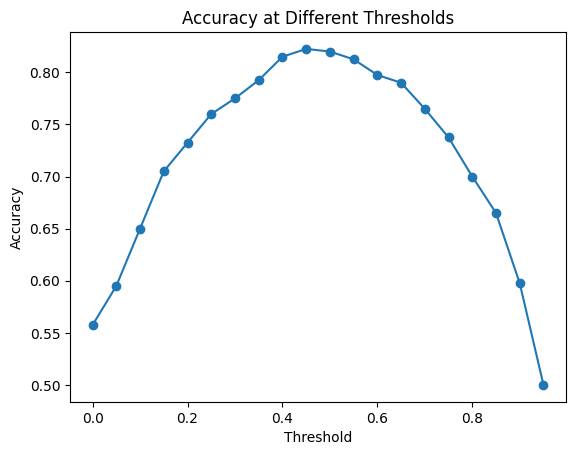

Best treshold is 0.45 and best score is 0.8225
Best threshold train 0.45


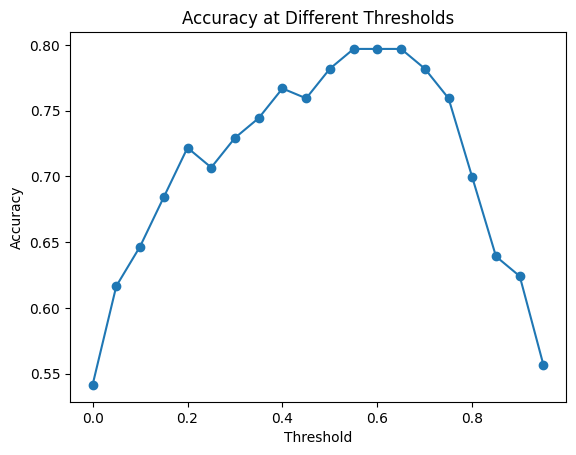

Best treshold is 0.55 and best score is 0.7969924812030075
Best threshold val: 0.55


In [4]:
best_treshold_lr_train=find_best_threshold(y_train, best_lr_A.predict_proba(X_train_with_A))
print("Best threshold train",best_treshold_lr_train)
best_treshold_lr_val=find_best_threshold(y_val, best_lr_A.predict_proba(X_val_with_A))
print("Best threshold val:",best_treshold_lr_val)

# Metrics obtained for ML predictions

# Use Fairness optimizer

In [5]:
threshold_optimizer = ThresholdOptimizer(estimator=best_lr_A, constraints="true_positive_rate_parity", objective= "accuracy_score", prefit=True)

use_fairness_optimizer(threshold_optimizer,X_fit=X_train_with_A, y_fit=y_train_pred_lr_A, X_obs=X_val_with_A, y_obs=y_val_pred_lr_A, 
                        y_train=y_train, y_val=y_val, sensitive_1_fit= age_train, sensitive_2_fit=gender_train, sensitive_1_obs= age_val, sensitive_2_obs=gender_val,
                        name_1="AGE", name_2="GENDER", fitted=False)


threshold_optimizer = ThresholdOptimizer(estimator=best_lr_A, constraints="true_positive_rate_parity", objective= "accuracy_score", prefit=True)
use_fairness_optimizer(threshold_optimizer,X_fit=X_train_with_A, y_fit=y_train_pred_lr_A, X_obs=X_val_with_A, y_obs=y_val_pred_lr_A, 
                        y_train=y_train, y_val=y_val, sensitive_1_fit= gender_train, sensitive_2_fit=age_train, sensitive_1_obs= gender_val, sensitive_2_obs=age_val,
                        name_1="GENDER", name_2="AGE", fitted=False)


print()
print("VERIFICA")
print()


threshold_optimizer = ThresholdOptimizer(estimator=best_lr_A, constraints="true_positive_rate_parity", objective= "accuracy_score", prefit=True)
threshold_optimizer.predict_method='auto'
threshold_optimizer.fit(X_train_with_A, y_train, sensitive_features=gender_train)

############################################# ALEGE SENS FEATURE BUN #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!1
adjusted_gender_train = threshold_optimizer.predict(X_train_with_A, sensitive_features = gender_train)

adjusted_gender_val = threshold_optimizer.predict(X_val_with_A,sensitive_features=gender_val)


print()
print()

print("--------- SCORES AFTER OPTIMIZING FOR GENDER ---------")
print()
print("----- accuracy scores -----")


print(f' acc score train got from : {accuracy_score(y_train_pred_lr_A, y_train)} to {accuracy_score(adjusted_gender_train, y_train)}')
print(f" acc score val from : {accuracy_score(y_val_pred_lr_A, y_val)} to {accuracy_score(adjusted_gender_val, y_val)}")

print("----- Scores for fariness -----")

print(f'Gender train eq op went from: {eq_op_dif(y_train,y_train_pred_lr_A, sensitive_attribute=gender_train)} to {eq_op_dif(y_train, adjusted_gender_train, sensitive_attribute=gender_train)}')
print(f"Gender val eq op went from :  {eq_op_dif(y_val,y_val_pred_lr_A, sensitive_attribute=gender_val)} to {eq_op_dif(y_val, adjusted_gender_val, sensitive_attribute=gender_val)}")
print(f'Age train eq op went from: {eq_op_dif(y_train,y_train_pred_lr_A, sensitive_attribute=age_train)} to {eq_op_dif(y_train, adjusted_gender_train, sensitive_attribute=age_train)}')
print(f"Age val eq op went from :  {eq_op_dif(y_val,y_val_pred_lr_A, sensitive_attribute=age_val)} to {eq_op_dif(y_val, adjusted_gender_val, sensitive_attribute=age_val)}")









--------- SCORES AFTER OPTIMIZING FOR AGE ---------

----- accuracy scores -----
 acc score train got from : 0.82 to 0.82
 acc score val from : 0.7819548872180451 to 0.7744360902255639

----- Scores for fariness -----
AGE train eq op went from: 0.13622754491017963 to 0.0007485029940119681
AGE val eq op went from :  0.0793650793650793 to 0.06349206349206349
GENDER train eq op went from: 0.18343653250773995 to 0.2079463364293086
GENDER val eq op went from :  0.3787878787878788 to 0.36363636363636365
--------- SCORES AFTER OPTIMIZING FOR GENDER ---------

----- accuracy scores -----
 acc score train got from : 0.82 to 0.8325
 acc score val from : 0.7819548872180451 to 0.7669172932330827

----- Scores for fariness -----
GENDER train eq op went from: 0.18343653250773995 to 0.012383900928792602
GENDER val eq op went from :  0.3787878787878788 to 0.3787878787878788
AGE train eq op went from: 0.13622754491017963 to 0.130453378956373
AGE val eq op went from :  0.0793650793650793 to 0.0793650793


# Do the same fairness optimization on test set

In [7]:

threshold_optimizer = ThresholdOptimizer(estimator=best_lr_A, constraints="true_positive_rate_parity", objective= "accuracy_score", prefit=True)

use_fairness_optimizer(threshold_optimizer,X_fit=X_train_val_with_A, y_fit=y_train_val_pred_lr_A, X_obs=X_test_with_A, y_obs=y_test_pred_lr_A, 
                        y_train=y_train_val, y_val=y_test, sensitive_1_fit= age_train_val, sensitive_2_fit=gender_train_val, sensitive_1_obs= age_test, sensitive_2_obs=gender_test,
                        name_1="AGE", name_2="GENDER", fitted=False, name_dataset1="train_val",name_dataset2="test")

threshold_optimizer = ThresholdOptimizer(estimator=best_lr_A, constraints="true_positive_rate_parity", objective= "accuracy_score", prefit=True)
use_fairness_optimizer(threshold_optimizer,X_fit=X_train_val_with_A, y_fit=y_train_val_pred_lr_A, X_obs=X_test_with_A, y_obs=y_test_pred_lr_A, 
                        y_train=y_train_val, y_val=y_test, sensitive_1_fit= gender_train_val, sensitive_2_fit=age_train_val, sensitive_1_obs= gender_test, sensitive_2_obs=age_test,
                        name_1="GENDER", name_2="AGE", fitted=False, name_dataset1="train_val", name_dataset2="test")













e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


--------- SCORES AFTER OPTIMIZING FOR AGE ---------

----- accuracy scores -----
 acc score train_val got from : 0.8105065666041276 to 0.799249530956848
 acc score test from : 0.8134328358208955 to 0.7611940298507462

----- Scores for fariness -----
AGE train_val eq op went from: 0.1244147157190636 to 0.018060200668896353
AGE test eq op went from :  0.4126984126984127 to 0.031746031746031744
GENDER train_val eq op went from: 0.23037037037037034 to 0.22666666666666668
GENDER test eq op went from :  0.484375 to 0.140625
--------- SCORES AFTER OPTIMIZING FOR GENDER ---------

----- accuracy scores -----
 acc score train_val got from : 0.8105065666041276 to 0.8030018761726079
 acc score test from : 0.8134328358208955 to 0.7761194029850746

----- Scores for fariness -----
GENDER train_val eq op went from: 0.23037037037037034 to 0.026666666666666727
GENDER test eq op went from :  0.484375 to 0.046875
AGE train_val eq op went from: 0.1244147157190636 to 0.10234113712374582
AGE test eq op went

e:\Python_install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
